In [39]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [40]:
IMAGE_SIZE = 256
CHANNELS = 3
#train= r'C:\Users\ruths\Desktop\potato diseases\PlantVillage\Pepper__bell___Bacterial_spot'

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        r'C:\Users\ruths\Desktop\potato diseases\PlantVillage\train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 2153 images belonging to 3 classes.


In [42]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [43]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [44]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.72156864 0.70980394 0.75294125]
  [0.7135485  0.7017838  0.744921  ]
  [0.69382685 0.68206215 0.7251994 ]
  ...
  [0.6202018  0.6084371  0.6515744 ]
  [0.6213511  0.6095864  0.6527237 ]
  [0.6225005  0.6107358  0.653873  ]]

 [[0.72156864 0.70980394 0.75294125]
  [0.7144105  0.7026458  0.74578303]
  [0.6955508  0.6837861  0.72692335]
  ...
  [0.65053713 0.6387724  0.6819097 ]
  [0.65369767 0.64193296 0.6850702 ]
  [0.6568583  0.64509356 0.6882309 ]]

 [[0.72156864 0.70980394 0.75294125]
  [0.7152725  0.7035078  0.74664503]
  [0.69727474 0.68551004 0.7286473 ]
  ...
  [0.66850007 0.65673536 0.6998727 ]
  [0.6682128  0.65644807 0.6995853 ]
  [0.6679254  0.6561607  0.69929796]]

 ...

 [[0.5631564  0.5513917  0.594529  ]
  [0.564593   0.5528283  0.59596556]
  [0.56602967 0.55426496 0.5974022 ]
  ...
  [0.53440225 0.52263755 0.5657748 ]
  [0.55995667 0.54819196 0.5913292 ]
  [0.54898924 0.53722453 0.5803618 ]]

 [[0.5852079  0.5734432  0.6165804 ]
  [0.5872192  0.5754545  0.6185917 ]


In [45]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        r'C:\Users\ruths\Desktop\potato diseases\PlantVillage\train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 2153 images belonging to 3 classes.


In [46]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [47]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [48]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 113s 2s/step - loss: 0.9214 - accuracy: 0.4740 - val_loss: 0.8768 - val_accuracy: 0.4427
Epoch 2/20
47/47 [==============================] - 98s 2s/step - loss: 0.8756 - accuracy: 0.5053 - val_loss: 0.8019 - val_accuracy: 0.6510
Epoch 3/20
47/47 [==============================] - 113s 2s/step - loss: 0.7353 - accuracy: 0.6847 - val_loss: 0.5591 - val_accuracy: 0.8021
Epoch 4/20
47/47 [==============================] - 108s 2s/step - loss: 0.4725 - accuracy: 0.8132 - val_loss: 0.4712 - val_accuracy: 0.7760
Epoch 5/20
47/47 [==============================] - 105s 2s/step - loss: 0.3384 - accuracy: 0.8677 - val_loss: 0.1435 - val_accuracy: 0.9583
Epoch 6/20
47/47 [==============================] - 103s 2s/step - loss: 0.2275 - accuracy: 0.9196 - val_loss: 0.1562 - val_accuracy: 0.9531
Epoch 7/20
47/47 [==============================] - 89s 2s/step - loss: 0.1613 - accuracy: 0.9392 - val_loss: 0.1419 - val_accuracy: 0.9479
Epoch 8/20
47/4

In [49]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [31]:
history.history['loss'][:5]

[0.8952980637550354,
 0.7467684745788574,
 0.5662391781806946,
 0.46865591406822205,
 0.36919480562210083]

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [33]:
val_acc

[0.453125,
 0.734375,
 0.8072916865348816,
 0.8125,
 0.8645833134651184,
 0.9166666865348816,
 0.9010416865348816,
 0.9270833134651184,
 0.984375,
 0.9791666865348816,
 0.9427083134651184,
 0.9635416865348816,
 0.953125,
 0.9739583134651184,
 0.9791666865348816,
 0.9322916865348816,
 0.9895833134651184,
 0.984375,
 0.9947916865348816,
 0.9791666865348816]

In [34]:
acc

[0.46792706847190857,
 0.616356372833252,
 0.7427414059638977,
 0.8062120079994202,
 0.8338960409164429,
 0.8597074747085571,
 0.9000675082206726,
 0.9392302632331848,
 0.958776593208313,
 0.9647606611251831,
 0.9615125060081482,
 0.9493585228919983,
 0.9753989577293396,
 0.9561107158660889,
 0.9833776354789734,
 0.9675894379615784,
 0.9858204126358032,
 0.9810938835144043,
 0.9867021441459656,
 0.9824442863464355]

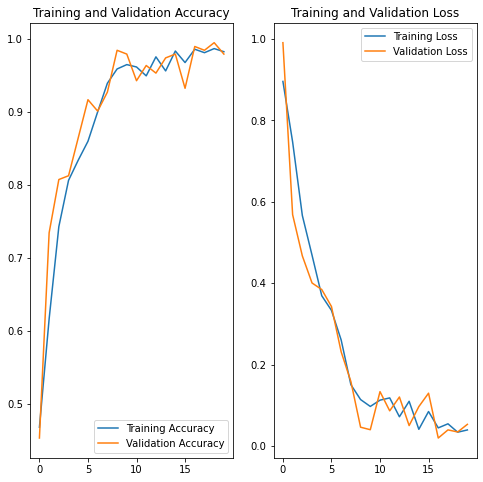

In [36]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [38]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

NameError: name 'test_generator' is not defined

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence